<a href="https://colab.research.google.com/github/jgumtau/datascience15/blob/main/1a_Empire_State_Building_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Climbing The Steps of The Empire State Building Steps: The Game
The objective is to create a Dice game logic, which will decide the odds of reaching Step number 60 of the Empire State Building in 100 rolls of the die. We would then simulate this sequence multiple times to calculate the probability of reaching step 60 in 100 tries using the Dice game logic.


In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Rules
For each random walk sequence we throw a Die.
1. Step 0 at ground level, is the starting point.
2. If the roll of the Die returns 1 or 2, climb down one step.
3. If the roll of the Die returns 3, 4 or 5, go up one step.
4. If the roll of the Die returns 6, throw the Die again and advance the number of steps equal to that throw.
5. There is a little chance of being clumsy and falling down the Stairs in which case we start again from 0.
6. The value of Steps cannot be negative, the lowest value would always be 0 (which is the starting point).

#Some pointers that might help with the code:

1. The function random.seed() may be used to make your results reproducible.
2. To represent clumsiness of falling down, generate a random number between 0 and 1. If that number is less than .001, set the steps value to Zero as is the rule.
3. You'll want to run the Dice game many times to calculate the probability of reaching step 60 in 100 rolls.




# Your Tasks
1. Write code for the above Dice game.
2. Estimate the probability of reaching step 60 in 100 rolls.
3. Create a plot of your random walk results.

# Solution


In [ ]:
def empire_state_building():
  score = [0,-1,-1,1,1,1,2]
  steps = 0
  floor = 0
  for i in range(100):
    roll = random.randint(1,6)
    # looks up the score index using the roll
    if roll == 6:
      steps += random.randint(1,6)

    elif 1 <= roll <= 5:
      steps += score[roll]
      steps = max (0, steps)

    else:
      print("Invalid roll")

    if steps > 0:
      # generates a random float between zero and one
      clumsy = random.random()
      if clumsy < 0.01:
        steps = 0
  # if steps >= 60:
  #   print(f'You made it {steps} steps.')
  #   print('You win!')

  # else:
  #   print(f'You made it {steps} steps.')
  #   print('You lose!')
  return steps

In [ ]:
empire_state_building()

11

In [ ]:
n = 10000
plays = np.array([empire_state_building() for i in range(n)])

In [ ]:
type(plays)

numpy.ndarray

In [ ]:
plays

array([ 5, 74, 77, ..., 11, 73, 58])

In [ ]:
(plays>60).mean()

0.3897

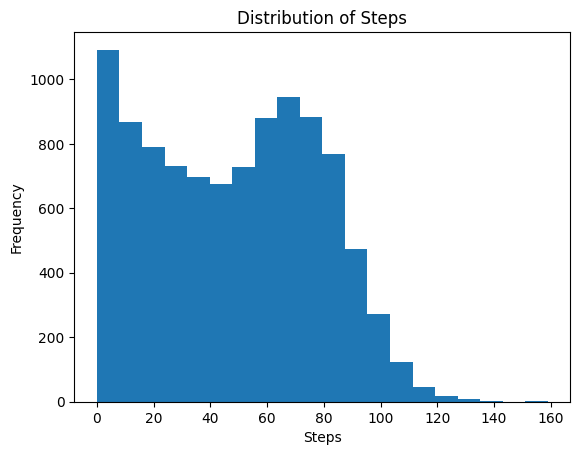

In [ ]:
# plot the results
plt.hist(plays, bins=20)
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Steps')
plt.show()